In [37]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import numpy as np
import arff
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
german_num_df = pd.read_csv('../German_Credit_data/german.data-numeric', delim_whitespace=True, index_col=False, header=None)

In [6]:
train_df, test_df = train_test_split(german_num_df, test_size=0.2)
train_df.shape, test_df.shape

((800, 25), (200, 25))

In [54]:
li = [1,2,3,4,5]
li[:-1]

[1, 2, 3, 4]

In [55]:
X_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]
y_train_ohe = pd.get_dummies(train_df.iloc[:,-1])

X_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]
y_test_ohe = pd.get_dummies(test_df.iloc[:,-1])


X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 24), (800,), (200, 24), (200,))

In [56]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [79]:
# y_test

In [80]:
# X_train.shape

In [59]:
# y_train.unique()

In [69]:
%%time
from sklearn.ensemble import RandomForestClassifier

class_weight = [{0: 1,1: 6},{0: 2,1: 6}]
clf = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=0, class_weight=class_weight)
clf.fit(X_train, y_train_ohe.values)

CPU times: user 32.5 ms, sys: 125 µs, total: 32.7 ms
Wall time: 31.3 ms


RandomForestClassifier(class_weight=[{0: 1, 1: 6}, {0: 2, 1: 6}], max_depth=10,
                       n_estimators=10, random_state=0)

In [74]:
%%time
y_train_pred = clf.predict(X_train)
accuracy_score(y_train_ohe, y_train_pred)

CPU times: user 11.3 ms, sys: 0 ns, total: 11.3 ms
Wall time: 12.8 ms


0.90625

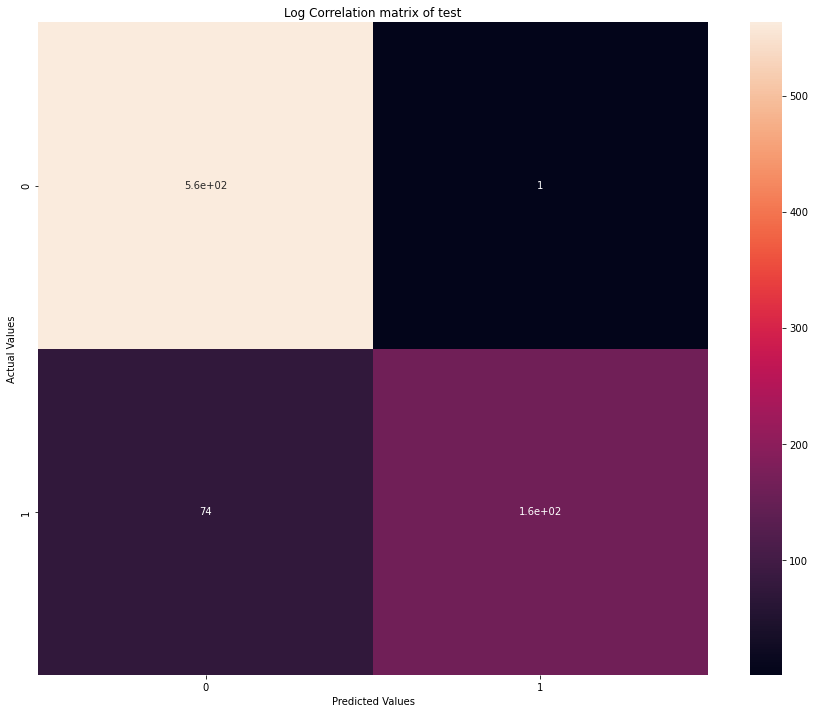

In [78]:
test_cnf_matrix = confusion_matrix(np.argmax(y_train_ohe.values, axis=1), np.argmax(y_train_pred, axis=1))
plt.figure(figsize=(15,12))
test_cnf_df = pd.DataFrame(test_cnf_matrix, index= range(2), columns=range(2))
# sns.heatmap(np.log(test_cnf_df+1), annot=True)
# sns.heatmap(np.log2(test_cnf_df+1), annot=True)
sns.heatmap(test_cnf_df, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title("Log Correlation matrix of test")
plt.savefig('rf_traffic_conf_mat_test.png')

In [64]:
# %%time
# from pytorch_tabnet.multitask import TabNetMultiTaskClassifier
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# # Xp_train = torch.Tensor(X_train)
# # yp_train = torch.Tensor(y_train.values)

# # Xp_test = torch.Tensor(X_test)
# # yp_test = torch.Tensor(y_test.values)

# clf = TabNetClassifier() 
# clf.fit(
#   X_train, y_train,
#   eval_set=[(X_test, y_test)], max_epochs=30
# )

# # clf.fit(
# #   Xp_train.to(device), yp_train.to(device),
# #   eval_set=[(Xp_test, yp_test)], max_epochs=30
# # )

# # clf = TabNetMultiTaskClassifier()
# # clf.fit(
# #   X_train, y_train_ohe.values, max_epochs=10, 
# #     eval_set=[(X_test, y_test_ohe.values)]
# # )

/home/harsh/anaconda3/lib/python3.9/site-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/home/harsh/anaconda3/lib/python3.9/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.0     | val_0_logloss: 1.29777 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_logloss: 1.29777 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_logloss: 1.29777 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_logloss: 1.29777 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_logloss: 1.29777 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_logloss: 1.29777 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_logloss: 1.29777 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_logloss: 1.29777 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_logloss: 1.29777 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_logloss: 1.29777 |  0:00:00s
Stop training because you reached max_epochs = 10 with best_epoch = 0 and best_val_0_logloss = 1.29777
CPU times: user 222 ms, sys: 3.23 ms, total: 225 ms
Wall time: 222 ms


In [62]:
y_pred_test = clf.predict(X_test)

In [63]:
accuracy_score(y_test, y_pred_test)

0.425